### Get data from SQL

SELECT city, country 
FROM city_list
WHERE country='Germany';

SELECT * 
FROM city_data
WHERE city='Munich';

SELECT global_data.year, city_data.city, global_data.avg_temp as glo_avg_temp, city_data.avg_temp as munich_avg_temp
FROM global_data JOIN city_data
ON global_data.year = city_data.year
WHERE city='Munich';

## Moving Averages

Let's analyse the moving averages for the weather in Munich.

In [1]:
### load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('results.csv', index_col='year', parse_dates=True)

## Explore the dataset

### Assessing the data

In [2]:
df.head()

,city,glo_avg_temp,munich_avg_temp
year,,,
1750-01-01,Munich,8.72,5.40
1751-01-01,Munich,7.98,5.54
1752-01-01,Munich,5.78,0.53
1753-01-01,Munich,8.39,4.61
1754-01-01,Munich,8.47,4.33


In [3]:
df.tail()

,city,glo_avg_temp,munich_avg_temp
year,,,
2009-01-01,Munich,9.51,5.89
2010-01-01,Munich,9.70,4.85
2011-01-01,Munich,9.52,6.56
2012-01-01,Munich,9.51,5.88
2013-01-01,Munich,9.61,6.00


In [4]:
# check for count of columns
len(df.columns)

3

In [5]:
# check for duplicates
sum(df.duplicated())

1

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
# view missing value count for each feature in 2008
df.isnull().sum()

city               0
glo_avg_temp       0
munich_avg_temp    0
dtype: int64

In [8]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 1750-01-01 to 2013-01-01
Data columns (total 3 columns):
city               263 non-null object
glo_avg_temp       263 non-null float64
munich_avg_temp    263 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


In [9]:
df.describe()

,glo_avg_temp,munich_avg_temp
count,263.000000,263.00000
mean,8.357985,4.64251
std,0.575824,0.75824
min,5.780000,0.53000
25%,8.075000,4.18500
50%,8.360000,4.66000
75%,8.700000,5.13500
max,9.730000,6.64000


In [10]:
# view dimensions of dataset
df.shape

(263, 3)

In [11]:
df.munich_avg_temp.unique()

array([5.4 , 5.54, 0.53, 4.61, 4.33, 4.05, 4.64, 4.3 , 3.83, 4.89, 5.02,
       4.94, 4.49, 4.25, 4.82, 4.52, 4.28, 3.85, 3.84, 4.43, 4.36, 4.19,
       5.81, 4.76, 5.03, 4.21, 5.21, 5.53, 4.71, 5.48, 3.96, 5.22, 3.67,
       3.35, 3.71, 4.83, 4.69, 4.26, 4.91, 5.09, 4.77, 5.06, 4.59, 4.65,
       5.55, 4.81, 3.26, 5.31, 5.07, 4.2 , 4.8 , 3.09, 5.05, 3.58, 4.72,
       5.7 , 3.39, 3.87, 3.46, 4.01, 2.96, 4.66, 4.97, 3.88, 5.85, 4.22,
       2.79, 3.9 , 4.45, 5.72, 4.07, 4.4 , 3.68, 3.29, 3.66, 5.16, 4.09,
       4.48, 4.03, 3.73, 4.37, 3.69, 4.08, 3.52, 4.41, 3.63, 3.41, 4.62,
       5.39, 5.35, 4.75, 5.01, 4.44, 3.57, 3.53, 5.51, 4.18, 4.79, 4.74,
       4.24, 4.58, 4.16, 4.67, 4.47, 3.72, 3.7 , 4.  , 5.13, 5.  , 4.57,
       4.31, 4.38, 3.98, 3.75, 4.13, 4.39, 4.9 , 3.91, 5.29, 3.93, 4.88,
       4.11, 4.42, 5.11, 4.86, 5.19, 5.24, 5.59, 5.2 , 3.45, 3.8 , 5.56,
       5.14, 5.49, 5.44, 4.27, 4.93, 3.94, 3.99, 4.92, 5.1 , 5.18, 4.68,
       5.23, 4.95, 5.32, 4.32, 4.87, 5.6 , 4.85, 5.

In [12]:
# checks if any of columns in have null values - should print False
df.isnull().sum().any()

False

In [13]:
# check the mean temperature
df.groupby('year').mean()[:5]

,glo_avg_temp,munich_avg_temp
year,,
1750-01-01,8.72,5.40
1751-01-01,7.98,5.54
1752-01-01,5.78,0.53
1753-01-01,8.39,4.61
1754-01-01,8.47,4.33


## Visualize Data

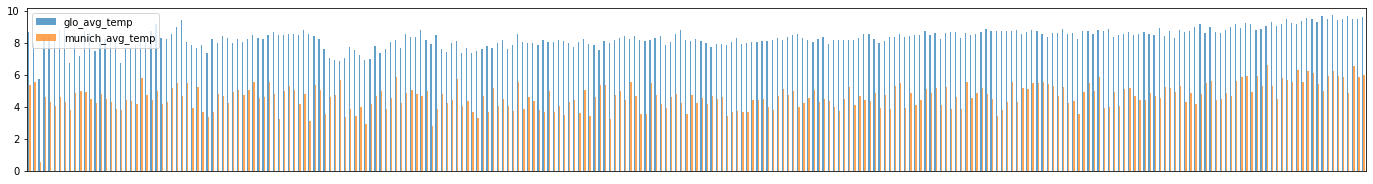

In [14]:
df.plot(kind='bar',figsize=(24,3),alpha=.7).axes.get_xaxis().set_visible(False)

task adjust the index for the chart above

In [15]:
df.columns

Index(['city', 'glo_avg_temp', 'munich_avg_temp'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 1750-01-01 to 2013-01-01
Data columns (total 3 columns):
city               263 non-null object
glo_avg_temp       263 non-null float64
munich_avg_temp    263 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


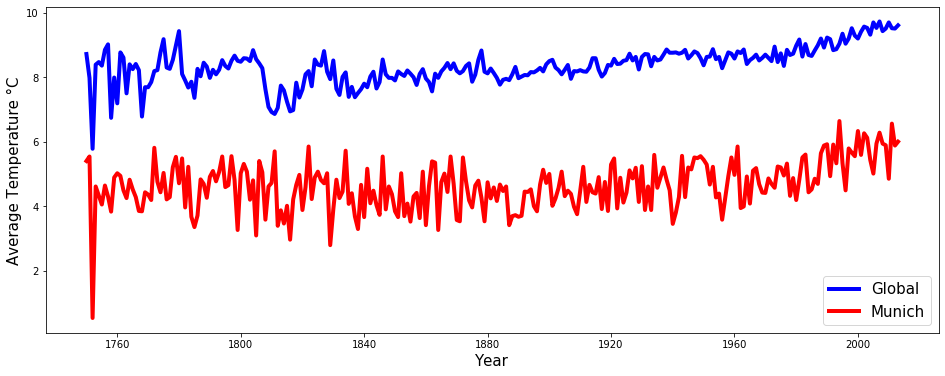

In [17]:
plt.figure(figsize=(16,6))   #setting figure size
plt.plot('glo_avg_temp', data=df, color='blue', linewidth=4, label='Global')
plt.plot('munich_avg_temp', data=df, color='red', linewidth=4, label='Munich')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Temperature °C", fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show();

## Let's take a look at the moving averages (MA)
- create moving averages for global and munich values based on
    - 7 years
    - 14 years
    - all time MA

In [18]:
# 7 years MA
df['7_years_Glo'] = df['glo_avg_temp'].rolling(7).mean()
df['7_years_M'] = df['munich_avg_temp'].rolling(7).mean()

# 14 years MA
df['14_years_Glo'] = df['glo_avg_temp'].rolling(14).mean()
df['14_years_M'] = df['munich_avg_temp'].rolling(14).mean()

# All time MA
df['All_Time_Glo'] = df['glo_avg_temp'].expanding().mean()
df['All_Time_M'] = df['munich_avg_temp'].expanding().mean()

In [19]:
df.head()

,city,glo_avg_temp,munich_avg_temp,7_years_Glo,7_years_M,14_years_Glo,14_years_M,All_Time_Glo,All_Time_M
year,,,,,,,,,
1750-01-01,Munich,8.72,5.40,NaN,NaN,NaN,NaN,8.720000,5.400000
1751-01-01,Munich,7.98,5.54,NaN,NaN,NaN,NaN,8.350000,5.470000
1752-01-01,Munich,5.78,0.53,NaN,NaN,NaN,NaN,7.493333,3.823333
1753-01-01,Munich,8.39,4.61,NaN,NaN,NaN,NaN,7.717500,4.020000
1754-01-01,Munich,8.47,4.33,NaN,NaN,NaN,NaN,7.868000,4.082000


In [20]:
df.columns

Index(['city', 'glo_avg_temp', 'munich_avg_temp', '7_years_Glo', '7_years_M',
       '14_years_Glo', '14_years_M', 'All_Time_Glo', 'All_Time_M'],
      dtype='object')

### Visualization 7 years Moving Averages

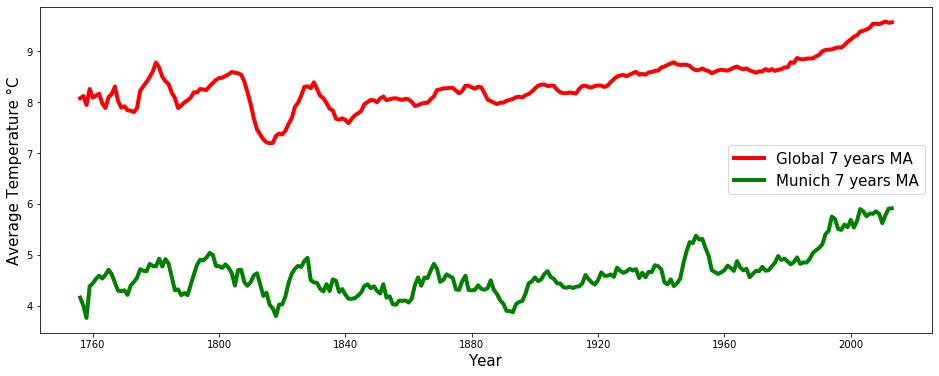

In [21]:
plt.figure(figsize=(16,6))   #setting figure size
plt.plot('7_years_Glo', data=df, color='red', linewidth=4, label='Global 7 years MA')
plt.plot('7_years_M', data=df, color='green', linewidth=4, label='Munich 7 years MA')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Temperature °C", fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.show();

### Visualization 14 years Moving Averages

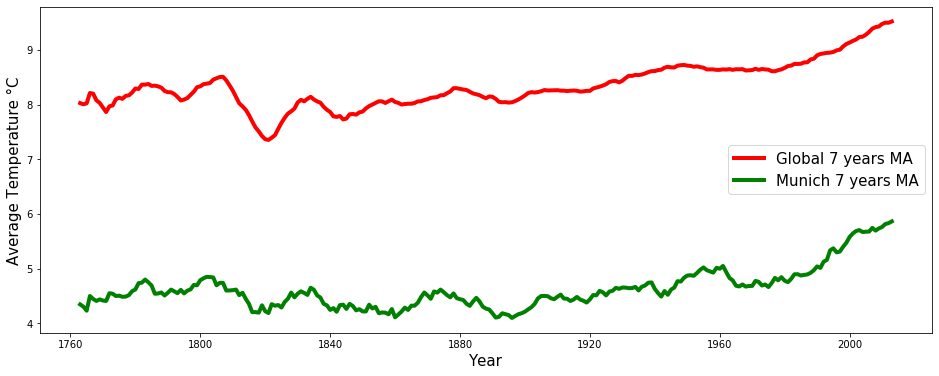

In [22]:
plt.figure(figsize=(16,6))   #setting figure size
plt.plot('14_years_Glo', data=df, color='red', linewidth=4, label='Global 7 years MA')
plt.plot('14_years_M', data=df, color='green', linewidth=4, label='Munich 7 years MA')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Temperature °C", fontsize=15)
plt.legend(loc='center right', fontsize=15)
plt.show();

### Visualization Moving Averages - All time

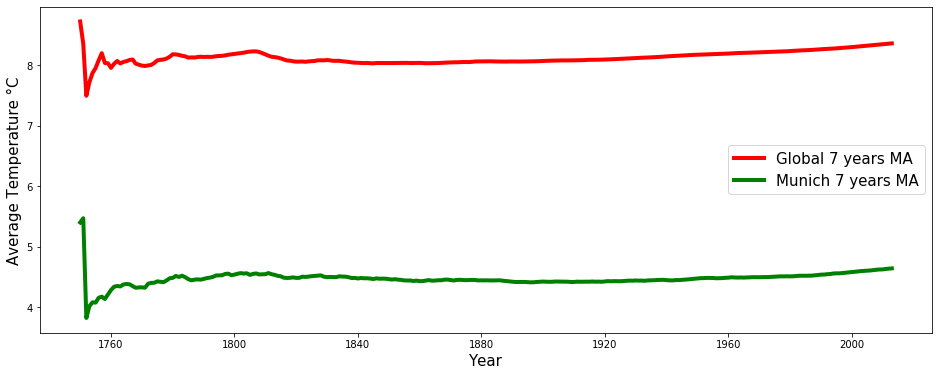

In [23]:
plt.figure(figsize=(16,6))   #setting figure size
plt.plot('All_Time_Glo', data=df, color='red', linewidth=4, label='Global 7 years MA')
plt.plot('All_Time_M', data=df, color='green', linewidth=4, label='Munich 7 years MA')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Temperature °C", fontsize=15)
plt.legend(loc='center right', fontsize=15)
plt.show();

In [27]:
df['all_y_corr'] = df['All_Time_Glo'].corr(df['All_Time_M'])
df.head(100)

,city,glo_avg_temp,munich_avg_temp,7_years_Glo,7_years_M,14_years_Glo,14_years_M,All_Time_Glo,All_Time_M,7_y_corr,14_y_corr,all_y_corr
year,,,,,,,,,,,,
1750-01-01,Munich,8.72,5.40,NaN,NaN,NaN,NaN,8.720000,5.400000,0.831367,0.888883,0.753356
1751-01-01,Munich,7.98,5.54,NaN,NaN,NaN,NaN,8.350000,5.470000,0.831367,0.888883,0.753356
1752-01-01,Munich,5.78,0.53,NaN,NaN,NaN,NaN,7.493333,3.823333,0.831367,0.888883,0.753356
1753-01-01,Munich,8.39,4.61,NaN,NaN,NaN,NaN,7.717500,4.020000,0.831367,0.888883,0.753356
1754-01-01,Munich,8.47,4.33,NaN,NaN,NaN,NaN,7.868000,4.082000,0.831367,0.888883,0.753356
1755-01-01,Munich,8.36,4.05,NaN,NaN,NaN,NaN,7.950000,4.076667,0.831367,0.888883,0.753356
1756-01-01,Munich,8.85,4.64,8.078571,4.157143,NaN,NaN,8.078571,4.157143,0.831367,0.888883,0.753356
1757-01-01,Munich,9.02,4.30,8.121429,4.000000,NaN,NaN,8.196250,4.175000,0.831367,0.888883,0.753356
1758-01-01,Munich,6.74,3.83,7.944286,3.755714,NaN,NaN,8.034444,4.136667,0.831367,0.888883,0.753356


## Observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. 

<p style="color:purple;">Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?</p>

- <p style="color:blue;">Munich is cooler on average compared to the global average temperature</p>

<p style="color:purple;">“How do the changes in your city’s temperatures over time compare to the changes in the global average?”</p>

- <p style="color:blue;">Looking at the 7-Year and the 14-Year moving averages the temperature change seems more volatile. Comparing the all time data averages the trend seems almost identical. Looking at the overall movement of the temperature, the data shows that both the global AVG temperature as well the AVG temperature in Munich are rising over time.</p>

<p style="color:purple;">“Is the average temperature in Munich a good indicator for the global average temperature?”</p>

- <p style="color:blue;">Looking at the data over time, Munich is a good indicator for the global average temperature</p>

<p style="color:purple;">What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?</p>

- <p style="color:blue;">The world is on average getting hotter. Toward the end of the data measurement the records show all- time high in global average temperatures. The same is true for Munich. There is also a trend in rise of the temperature in the 20th century which unfortunately has started to increase at a higher rate around the year 2000.</p>



#### Submission

- Tools used:
    - Retrieval of data was in SQL in step 3 of the project.
    - Once the data has been downloaded and loaded into Pandas DataFrame all of the remaining steps have been performed with Pandas and matplotlib
- The moving average calculations have been performed with:
    - the pandas dataframe rolling method [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)
    - on which the [mean method](https://stackoverflow.com/questions/43437657/rolling-mean-on-pandas-on-a-specific-column) has been applied
- The key considerations with regards to visualization were to compare the moving averages with a window of  7 years and 14 years.
    - In addition, I also applied the moving average on the entire time series for which I used the [expanding()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html) method